In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/z_/jz4f3stj0xq5g99z3sb19w3r0000gn/T/ipykernel_9368/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('./Results/pm_log.csv')
df.head()
                 

,time,pm_assignments,pm_ask_reports,pm_reassign,pm_work_on,pm_cooperations,pm_evaluate_performance,pm_motivate,pm_priority,pm_optimize,pm_take_chance,problems_count,escalate_problem_count,cooperation_prob,trust_in_agents,completed_tasks,fail_tasks
0,0,30,0,0,NaN,0,False,0,NaN,0,NaN,0,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",0,0
1,10,6,0,0,NaN,0,False,3,time,0,"Risk(Probability: 0.25, Impact: ['Resource5', ...",0,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",1,0
2,20,6,0,0,NaN,0,False,3,time,0,"Risk(Probability: 0.25, Impact: ['Resource5', ...",3,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",4,0
3,30,3,0,0,NaN,0,False,3,time,0,"Risk(Probability: 0.2, Impact: ['Resource7', '...",4,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",9,0
4,40,0,3,0,NaN,0,False,3,time,0,"Risk(Probability: 0.3, Impact: ['Resource1', '...",4,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",15,0


In [3]:
# Crear una columna para simular el cambio de simulaciones
df['simulacion_id'] = (df['time'].shift(1) > df['time']).cumsum() + 1

# Mostrar las primeras filas
df.head()

,time,pm_assignments,pm_ask_reports,pm_reassign,pm_work_on,pm_cooperations,pm_evaluate_performance,pm_motivate,pm_priority,pm_optimize,pm_take_chance,problems_count,escalate_problem_count,cooperation_prob,trust_in_agents,completed_tasks,fail_tasks,simulacion_id
0,0,30,0,0,NaN,0,False,0,NaN,0,NaN,0,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",0,0,1
1,10,6,0,0,NaN,0,False,3,time,0,"Risk(Probability: 0.25, Impact: ['Resource5', ...",0,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",1,0,1
2,20,6,0,0,NaN,0,False,3,time,0,"Risk(Probability: 0.25, Impact: ['Resource5', ...",3,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",4,0,1
3,30,3,0,0,NaN,0,False,3,time,0,"Risk(Probability: 0.2, Impact: ['Resource7', '...",4,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",9,0,1
4,40,0,3,0,NaN,0,False,3,time,0,"Risk(Probability: 0.3, Impact: ['Resource1', '...",4,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",15,0,1


<Figure size 1000x600 with 0 Axes>

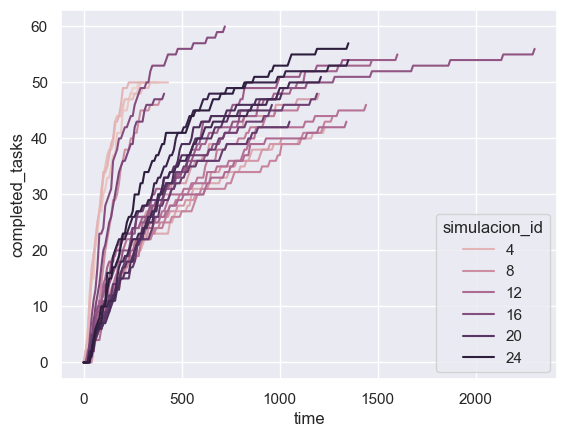

In [4]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.color_palette("Paired")

fig, ax = plt.subplots()
sns.lineplot(x='time', y='completed_tasks', hue='simulacion_id', data=df, ax=ax)
plt.show()

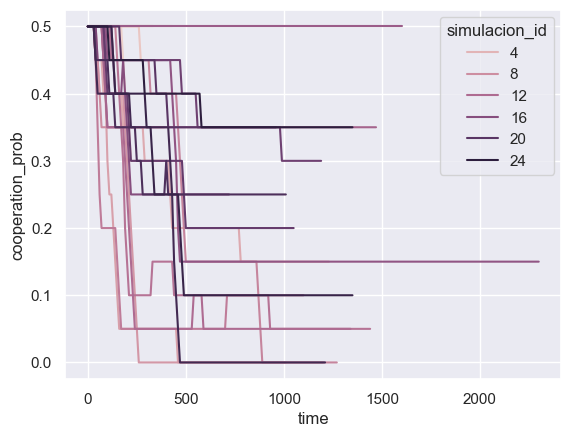

In [5]:
fig, ax = plt.subplots()
sns.lineplot(x='time', y='cooperation_prob', hue='simulacion_id', data=df, ax=ax)
plt.show()

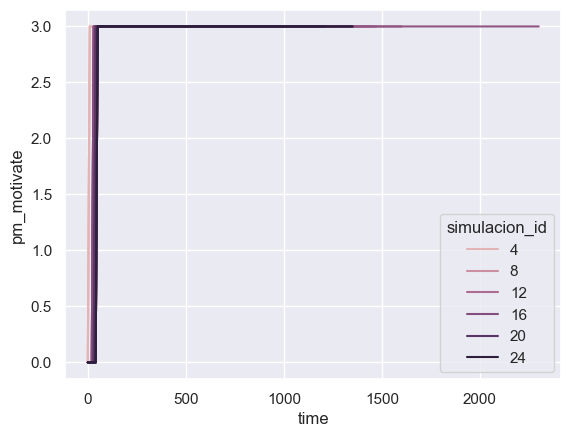

In [6]:
fig, ax = plt.subplots()
sns.lineplot(x='time', y='pm_motivate', hue='simulacion_id', data=df, ax=ax)
plt.show()

In [7]:
df.dtypes

time                         int64
pm_assignments               int64
pm_ask_reports               int64
pm_reassign                  int64
pm_work_on                 float64
pm_cooperations              int64
pm_evaluate_performance       bool
pm_motivate                  int64
pm_priority                 object
pm_optimize                  int64
pm_take_chance              object
problems_count               int64
escalate_problem_count       int64
cooperation_prob           float64
trust_in_agents             object
completed_tasks              int64
fail_tasks                   int64
simulacion_id                int64
dtype: object

In [8]:
def mean_workers(row, idx, df):
    sum = 0
    workers = eval(df.at[idx, 'trust_in_agents'])
    for w in workers:
        sum += w[1]

    return sum/len(workers)

df['trust_agents_mean'] = df.apply(lambda row: mean_workers(row, row.name, df), axis=1)
df.head()

,time,pm_assignments,pm_ask_reports,pm_reassign,pm_work_on,pm_cooperations,pm_evaluate_performance,pm_motivate,pm_priority,pm_optimize,pm_take_chance,problems_count,escalate_problem_count,cooperation_prob,trust_in_agents,completed_tasks,fail_tasks,simulacion_id,trust_agents_mean
0,0,30,0,0,NaN,0,False,0,NaN,0,NaN,0,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",0,0,1,36.0
1,10,6,0,0,NaN,0,False,3,time,0,"Risk(Probability: 0.25, Impact: ['Resource5', ...",0,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",1,0,1,36.0
2,20,6,0,0,NaN,0,False,3,time,0,"Risk(Probability: 0.25, Impact: ['Resource5', ...",3,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",4,0,1,36.0
3,30,3,0,0,NaN,0,False,3,time,0,"Risk(Probability: 0.2, Impact: ['Resource7', '...",4,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",9,0,1,36.0
4,40,0,3,0,NaN,0,False,3,time,0,"Risk(Probability: 0.3, Impact: ['Resource1', '...",4,0,0.5,"[('Worker 0', 50), ('Worker 1', 27), ('Worker ...",15,0,1,36.0


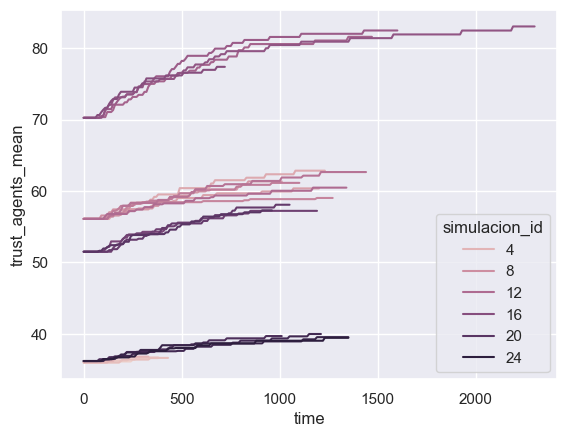

In [9]:
fig, ax = plt.subplots()
sns.lineplot(x='time', y='trust_agents_mean', hue='simulacion_id', data=df, ax=ax)
plt.show()

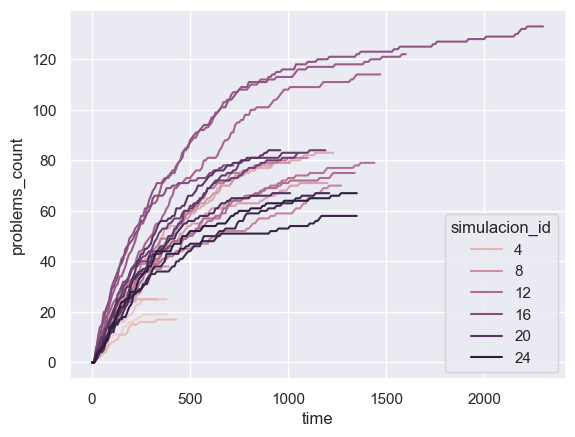

In [10]:
fig, ax = plt.subplots()
sns.lineplot(x='time', y='problems_count', hue='simulacion_id', data=df, ax=ax)
plt.show()

In [11]:
gcols = [
    'simulacion_id',
    'pm_reassign',
    'pm_cooperations',
    'pm_motivate',
    'pm_take_chance',
    'problems_count',
    'cooperation_prob',
    'completed_tasks'
]

gagg = {
    'pm_reassign': 'sum',
    'pm_cooperations': 'sum',
    'pm_motivate': 'median',
    'pm_take_chance': 'count',
    'problems_count': 'max',
    'cooperation_prob': 'mean',
    'completed_tasks': 'max'
}

df_summary = df[gcols].groupby(by='simulacion_id').agg(gagg)
df_summary.head()

,pm_reassign,pm_cooperations,pm_motivate,pm_take_chance,problems_count,cooperation_prob,completed_tasks
simulacion_id,,,,,,,
1,2,4,3.0,24,19,0.402564,50
2,1,1,3.0,17,25,0.484615,50
3,0,0,3.0,25,17,0.500000,50
4,1,0,3.0,22,25,0.500000,50
5,12,7,3.0,76,83,0.239516,42


In [13]:
print(df_summary.shape)
df_summary.describe()

(24, 7)


,pm_reassign,pm_cooperations,pm_motivate,pm_take_chance,problems_count,cooperation_prob,completed_tasks
count,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.000000
mean,7.416667,4.166667,3.0,61.541667,69.375000,0.297268,49.000000
std,5.020971,2.496374,0.0,30.371582,30.168818,0.144186,5.064798
min,0.000000,0.000000,3.0,17.000000,17.000000,0.062810,40.000000
25%,2.000000,2.750000,3.0,33.250000,55.000000,0.183938,46.000000
50%,9.000000,4.500000,3.0,64.500000,73.000000,0.301508,48.000000
75%,12.000000,6.000000,3.0,74.500000,83.000000,0.399095,51.750000
max,16.000000,9.000000,3.0,146.000000,133.000000,0.500000,60.000000


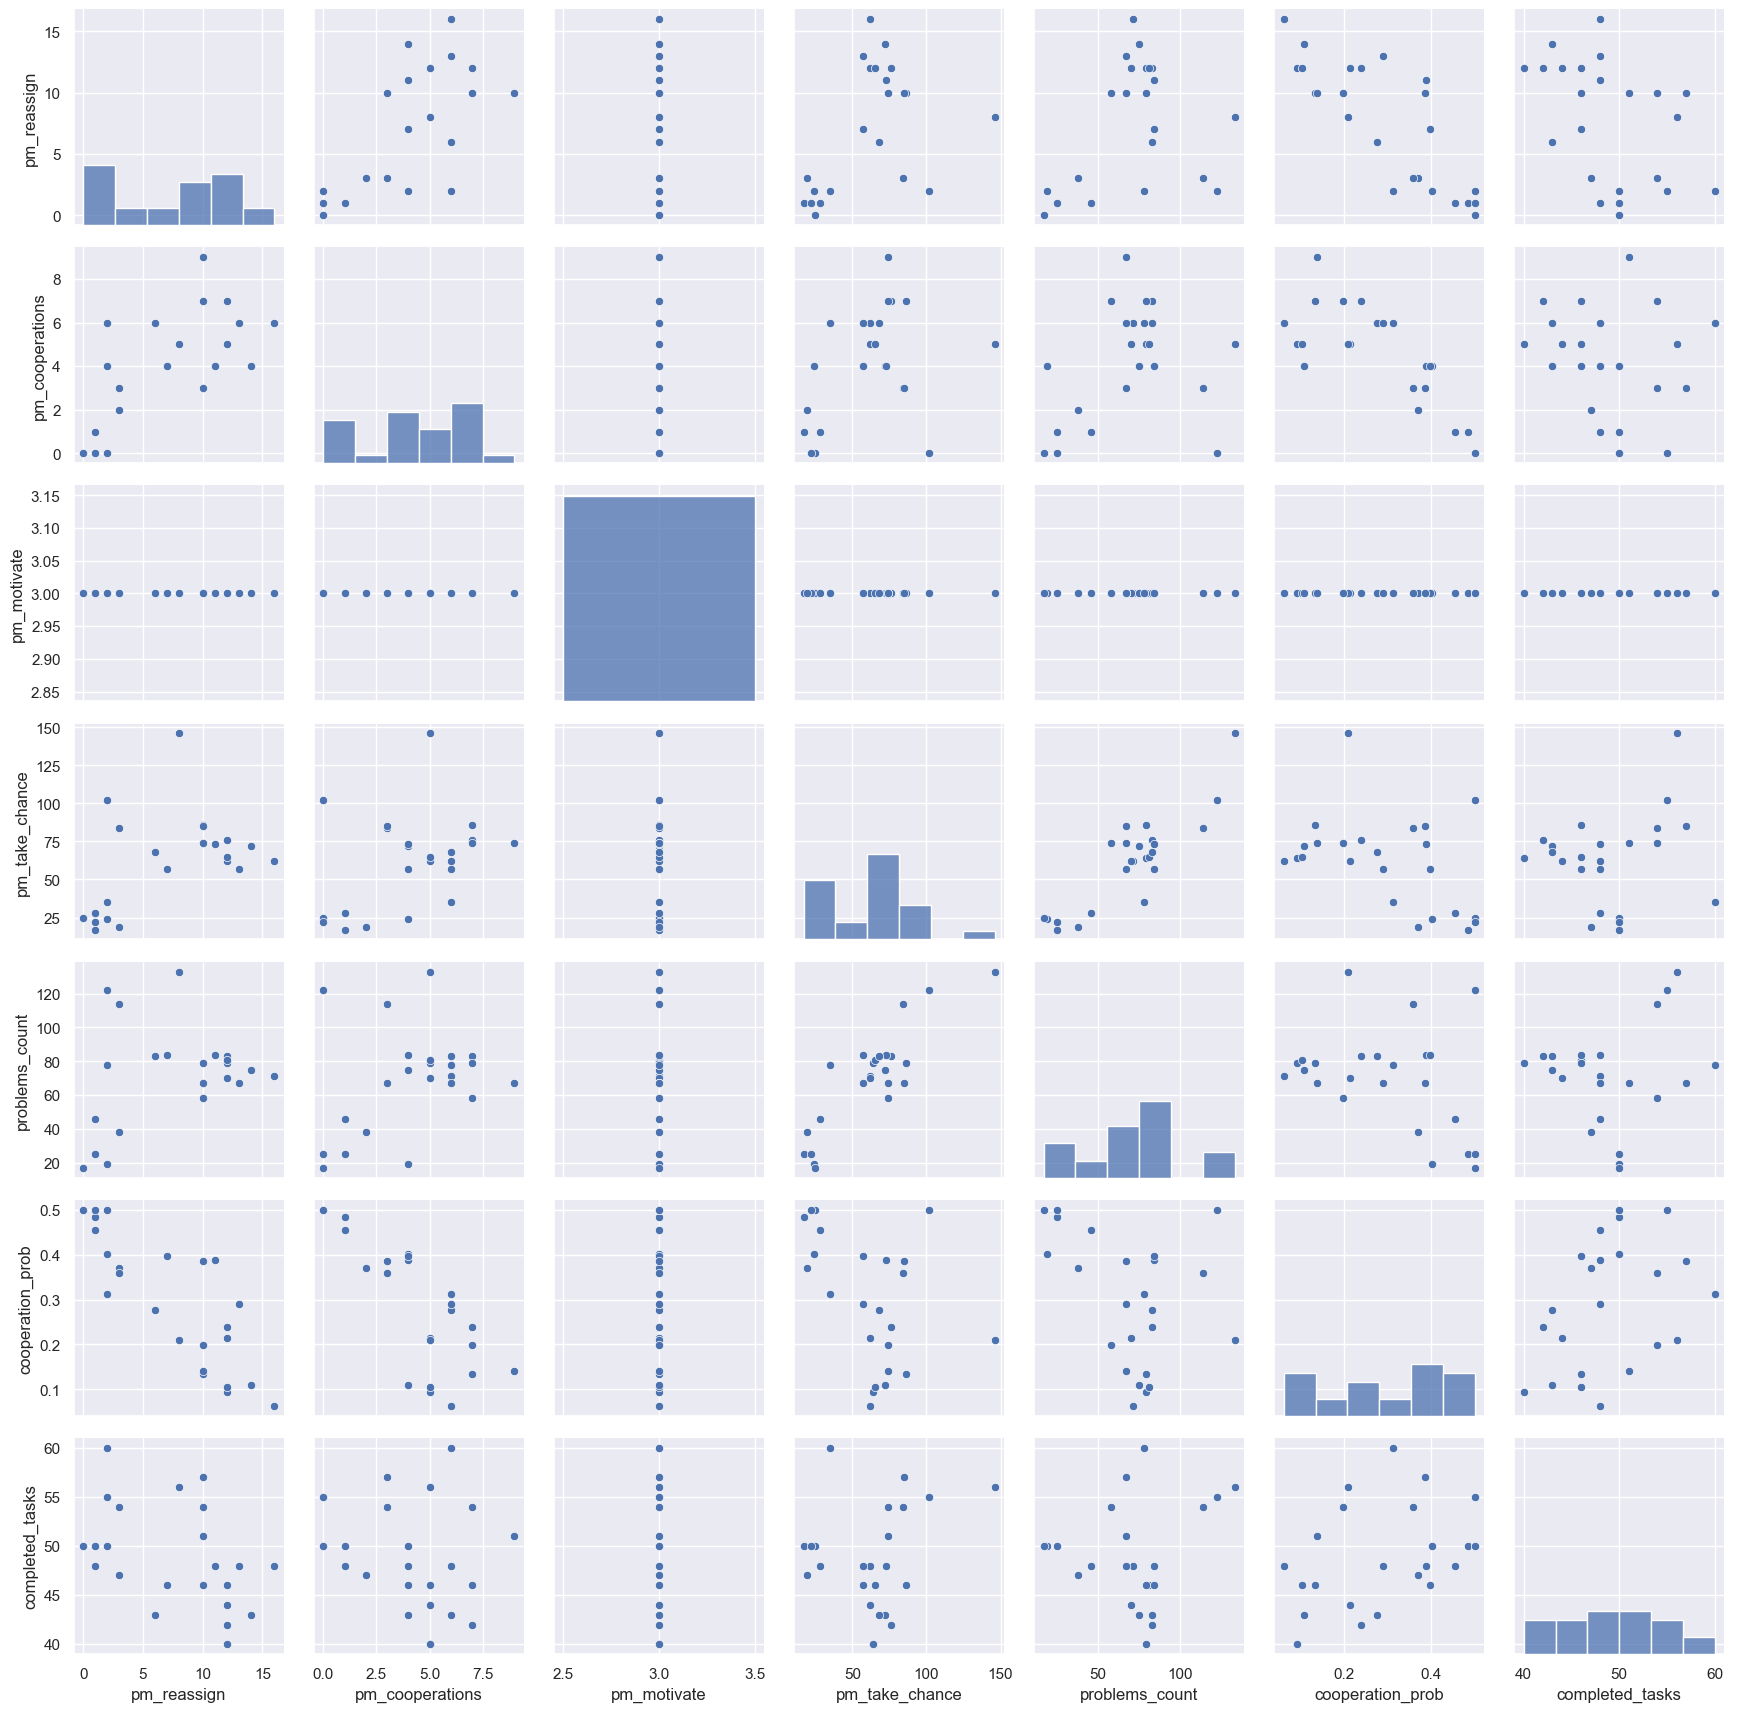

In [14]:
g = sns.PairGrid(df_summary)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

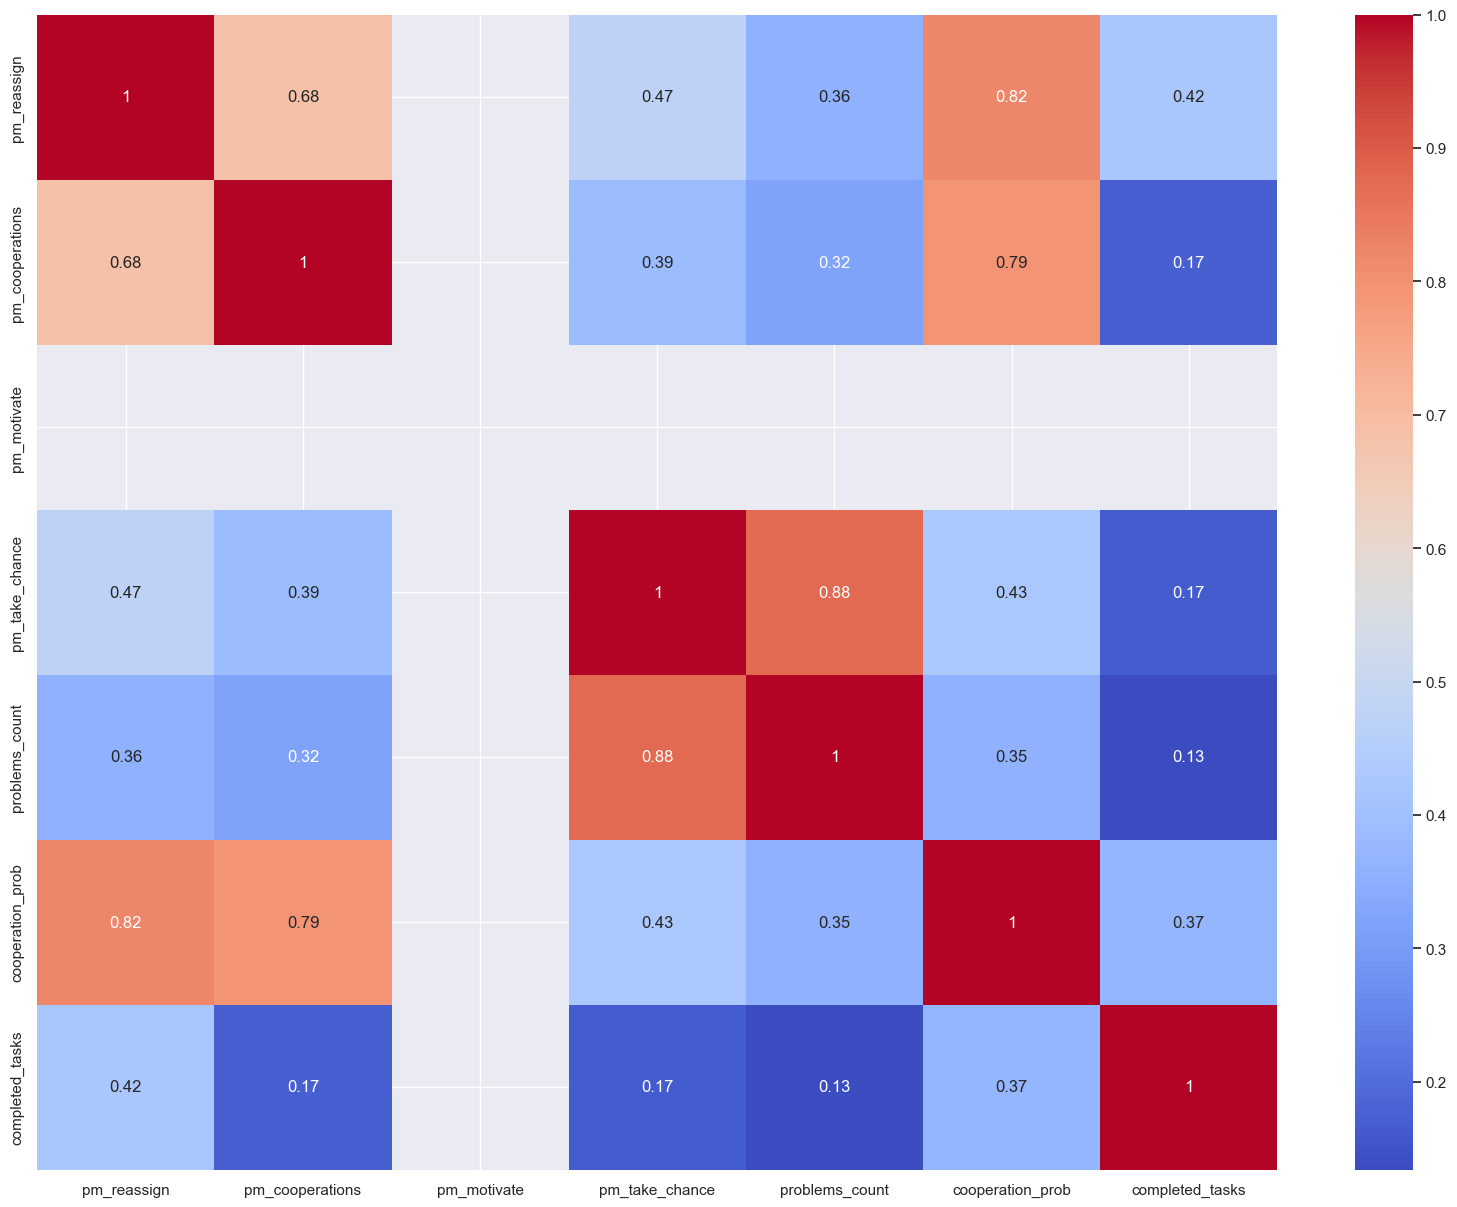

In [16]:
import numpy as np
# vamos a eliminar las columnas que no analizaremos
correlation_matrix = df_summary.corr()

fig, ax = plt.subplots(figsize=(20, 15)) 
sns.heatmap(np.abs(correlation_matrix), annot=True, cmap='coolwarm')
plt.show()